In [1]:
import tensorflow as tf
import tensorflow_addons as tfa
from augmentation_2d import *
import matplotlib.pyplot as plt
from icecream import ic
import cv2 as cv

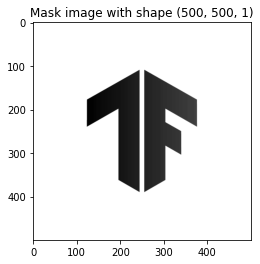

In [2]:
img_path = tf.keras.utils.get_file('tensorflow.png','https://tensorflow.org/images/tf_logo.png')
img_raw = tf.io.read_file(img_path)
img = tf.io.decode_image(img_raw)
img = tf.image.convert_image_dtype(img, tf.float32)
img = tf.image.resize(img, [500,500])
bw_img = tf.image.rgb_to_grayscale(img)
plt.title("Mask image with shape {}".format(bw_img.shape))
_ = plt.imshow(bw_img[...,0], cmap='gray')

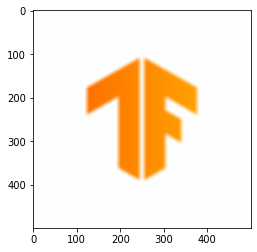

In [3]:
mean_og = tfa.image.mean_filter2d(img, filter_shape=11)
_ = plt.imshow(mean_og)

ic| bw_img.shape: TensorShape([500, 500, 1])
ic| bw_img_rgb.shape: TensorShape([500, 500, 3])
ic| bw_img_rgb.shape: TensorShape([1, 500, 500, 3])


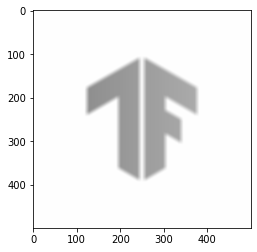

In [4]:
ic(bw_img.shape)
bw_img_rgb = tf.image.grayscale_to_rgb(bw_img)
ic(bw_img_rgb.shape)
bw_img_rgb = tf.expand_dims(bw_img_rgb, axis=0)
ic(bw_img_rgb.shape)
mean_bw = tfa.image.mean_filter2d(bw_img_rgb, filter_shape=11)
_ = plt.imshow(mean_bw[0])

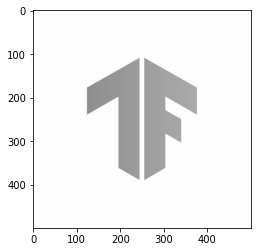

In [5]:
transform = tfa.image.transform(bw_img_rgb, [1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0])
_ = plt.imshow(transform[0])

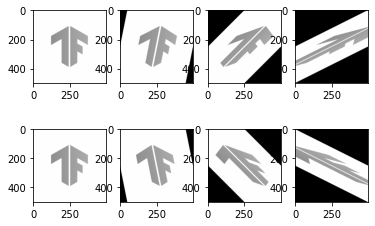

In [6]:
## skew x
fig, axs = plt.subplots(2, 4)

factor = 1e3
transform = tfa.image.transform(bw_img_rgb, [1.0, 1.0/factor, -250/factor, 0.0, 1.0, 0.0, 0.0, 0.0])
axs[0][0].imshow(transform[0])

factor = 5
transform = tfa.image.transform(bw_img_rgb, [1.0, 1.0/factor, -250/factor, 0.0, 1.0, 0.0, 0.0, 0.0])
axs[0][1].imshow(transform[0])

factor = 1
transform = tfa.image.transform(bw_img_rgb, [1.0, 1.0/factor, -250/factor, 0.0, 1.0, 0.0, 0.0, 0.0])
axs[0][2].imshow(transform[0])

factor = 0.5
transform = tfa.image.transform(bw_img_rgb, [1.0, 1.0/factor, -250/factor, 0.0, 1.0, 0.0, 0.0, 0.0])
axs[0][3].imshow(transform[0])

factor = -1e3
transform = tfa.image.transform(bw_img_rgb, [1.0, 1.0/factor, -250/factor, 0.0, 1.0, 0.0, 0.0, 0.0])
axs[1][0].imshow(transform[0])

factor = -5
transform = tfa.image.transform(bw_img_rgb, [1.0, 1.0/factor, -250/factor, 0.0, 1.0, 0.0, 0.0, 0.0])
axs[1][1].imshow(transform[0])

factor = -1
transform = tfa.image.transform(bw_img_rgb, [1.0, 1.0/factor, -250/factor, 0.0, 1.0, 0.0, 0.0, 0.0])
axs[1][2].imshow(transform[0])

factor = -0.5
transform = tfa.image.transform(bw_img_rgb, [1.0, 1.0/factor, -250/factor, 0.0, 1.0, 0.0, 0.0, 0.0])
axs[1][3].imshow(transform[0])

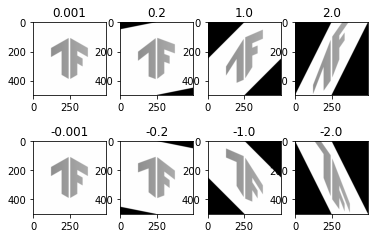

In [7]:
## skew y
fig, axs = plt.subplots(2, 4)

factor = 1/1e3
transform = tfa.image.transform(bw_img_rgb, [1.0, 0.0, 0.0, 1.0*factor, 1.0, -250*factor, 0.0, 0.0])
axs[0][0].set_title(factor)
axs[0][0].imshow(transform[0])

factor = 1/5
transform = tfa.image.transform(bw_img_rgb, [1.0, 0.0, 0.0, 1.0*factor, 1.0, -250*factor, 0.0, 0.0])
axs[0][1].set_title(factor)
axs[0][1].imshow(transform[0])

factor = 1/1
transform = tfa.image.transform(bw_img_rgb, [1.0, 0.0, 0.0, 1.0*factor, 1.0, -250*factor, 0.0, 0.0])
axs[0][2].set_title(factor)
axs[0][2].imshow(transform[0])

factor = 1/0.5
transform = tfa.image.transform(bw_img_rgb, [1.0, 0.0, 0.0, 1.0*factor, 1.0, -250*factor, 0.0, 0.0])
axs[0][3].set_title(factor)
axs[0][3].imshow(transform[0])

factor = -1/1e3
transform = tfa.image.transform(bw_img_rgb, [1.0, 0.0, 0.0, 1.0*factor, 1.0, -250*factor, 0.0, 0.0])
axs[1][0].set_title(factor)
axs[1][0].imshow(transform[0])

factor = -1/5
transform = tfa.image.transform(bw_img_rgb, [1.0, 0.0, 0.0, 1.0*factor, 1.0, -250*factor, 0.0, 0.0])
axs[1][1].set_title(factor)
axs[1][1].imshow(transform[0])

factor = -1/1
transform = tfa.image.transform(bw_img_rgb, [1.0, 0.0, 0.0, 1.0*factor, 1.0, -250*factor, 0.0, 0.0])
axs[1][2].set_title(factor)
axs[1][2].imshow(transform[0])

factor = -1/0.5
transform = tfa.image.transform(bw_img_rgb, [1.0, 0.0, 0.0, 1.0*factor, 1.0, -250*factor, 0.0, 0.0])
axs[1][3].set_title(factor)
axs[1][3].imshow(transform[0])

In [8]:
x_mag = np.array([[4,3]])

x_mag[:, 0]

array([4])

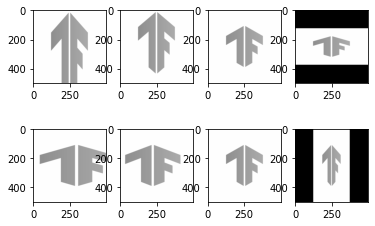

In [9]:
fig, axs = plt.subplots(2, 4)

factor = 2
transform = tfa.image.transform(bw_img_rgb, [1.0, 0.0, 0.0, 0.0, 1.0/factor, 100, 0.0, 0.0])
axs[0][0].imshow(transform[0])

factor = 1.5
transform = tfa.image.transform(bw_img_rgb, [1.0, 0.0, 0.0, 0.0, 1.0/factor, 100, 0.0, 0.0])
axs[0][1].imshow(transform[0])

factor = 1
transform = tfa.image.transform(bw_img_rgb, [1.0, 0.0, 0.0, 0.0, 1.0/factor, 0.0, 0.0, 0.0])
axs[0][2].imshow(transform[0])

factor = 0.5
transform = tfa.image.transform(bw_img_rgb, [1.0, 0.0, 0.0, 0.0, 1.0/factor, -250, 0.0, 0.0])
axs[0][3].imshow(transform[0])

factor = 2
transform = tfa.image.transform(bw_img_rgb, [1.0/factor, 0.0, 100, 0.0, 1.0, 0.0, 0.0, 0.0])
axs[1][0].imshow(transform[0])

factor = 1.5
transform = tfa.image.transform(bw_img_rgb, [1.0/factor, 0.0, 100, 0.0, 1.0, 0.0, 0.0, 0.0])
axs[1][1].imshow(transform[0])

factor = 1
transform = tfa.image.transform(bw_img_rgb, [1.0/factor, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0])
axs[1][2].imshow(transform[0])

factor = 0.5
transform = tfa.image.transform(bw_img_rgb, [1.0/factor, 0.0, -250, 0.0, 1.0, 0.0, 0.0, 0.0])
axs[1][3].imshow(transform[0])

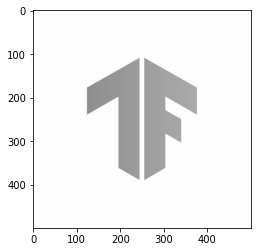

In [10]:
transform = tfa.image.transform(bw_img_rgb, [1.0, 0.0, 0.0, 0, 1.0, 0, 0.0, 0.0])
_ = plt.imshow(transform[0])

-125.0
-50.0
(1, 500, 500, 3)
(500, 500, 1)
(1, 500, 1)


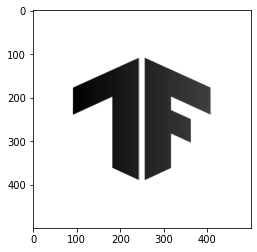

In [11]:
factor = 1.25

w = 500
diff = 1 - factor
print(w * (1-factor))
print((w * (1-factor))/(2 * factor))

print(bw_img_rgb.shape)

print(bw_img.shape)

bw_img_nhwc = np.expand_dims(bw_img, 0)


transform = tfa.image.transform(bw_img_nhwc, [1.0/factor, 0.0, -(w * (1-factor))/(2 * factor), 0.0, 1.0, 0.0, 0.0, 0.0])
print(transform[:,:,0].shape)
# transform = tfa.image.transform(bw_img_rgb, [1.0/factor, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0])
# transform = tfa.image.translate(transform, [[w * (1-factor)/2, 0]])
_ = plt.imshow(transform[0, ..., 0], cmap='gray')

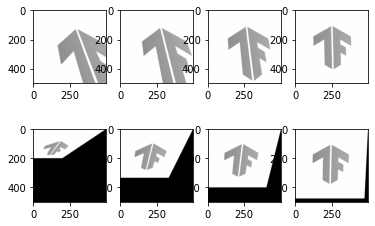

In [12]:
## weird skew x
fig, axs = plt.subplots(2, 4)

factor = 1.5e-3
transform = tfa.image.transform(bw_img_rgb, [1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, factor * 1.0])
axs[0][0].imshow(transform[0])

factor = 1e-3
transform = tfa.image.transform(bw_img_rgb, [1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, factor * 1.0])
axs[0][1].imshow(transform[0])

factor = 5e-4
transform = tfa.image.transform(bw_img_rgb, [1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, factor * 1.0])
axs[0][2].imshow(transform[0])

factor = 1e-4
transform = tfa.image.transform(bw_img_rgb, [1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, factor * 1.0])
axs[0][3].imshow(transform[0])

factor = -3e-3
transform = tfa.image.transform(bw_img_rgb, [1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, factor * 1.0])
axs[1][0].imshow(transform[0])

factor = -1e-3
transform = tfa.image.transform(bw_img_rgb, [1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, factor * 1.0])
axs[1][1].imshow(transform[0])

factor = -5e-4
transform = tfa.image.transform(bw_img_rgb, [1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, factor * 1.0])
axs[1][2].imshow(transform[0])

factor = -1e-4
transform = tfa.image.transform(bw_img_rgb, [1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, factor * 1.0])
axs[1][3].imshow(transform[0])

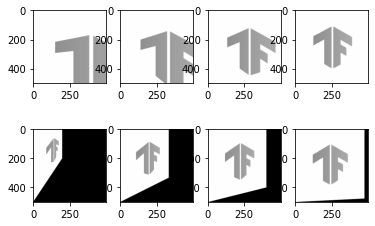

In [13]:
## weird skew y
fig, axs = plt.subplots(2, 4)

factor = 1.5e-3
transform = tfa.image.transform(bw_img_rgb, [1.0, 0.0, 0.0, 0.0, 1.0, 0.0, factor * 1.0, 0.0])
axs[0][0].imshow(transform[0])

factor = 1e-3
transform = tfa.image.transform(bw_img_rgb, [1.0, 0.0, 0.0, 0.0, 1.0, 0.0, factor * 1.0, 0.0])
axs[0][1].imshow(transform[0])

factor = 5e-4
transform = tfa.image.transform(bw_img_rgb, [1.0, 0.0, 0.0, 0.0, 1.0, 0.0, factor * 1.0, 0.0])
axs[0][2].imshow(transform[0])

factor = 1e-4
transform = tfa.image.transform(bw_img_rgb, [1.0, 0.0, 0.0, 0.0, 1.0, 0.0, factor * 1.0, 0.0])
axs[0][3].imshow(transform[0])

factor = -3e-3
transform = tfa.image.transform(bw_img_rgb, [1.0, 0.0, 0.0, 0.0, 1.0, 0.0, factor * 1.0, 0.0])
axs[1][0].imshow(transform[0])

factor = -1e-3
transform = tfa.image.transform(bw_img_rgb, [1.0, 0.0, 0.0, 0.0, 1.0, 0.0, factor * 1.0, 0.0])
axs[1][1].imshow(transform[0])

factor = -5e-4
transform = tfa.image.transform(bw_img_rgb, [1.0, 0.0, 0.0, 0.0, 1.0, 0.0, factor * 1.0, 0.0])
axs[1][2].imshow(transform[0])

factor = -1e-4
transform = tfa.image.transform(bw_img_rgb, [1.0, 0.0, 0.0, 0.0, 1.0, 0.0, factor * 1.0, 0.0])
axs[1][3].imshow(transform[0])

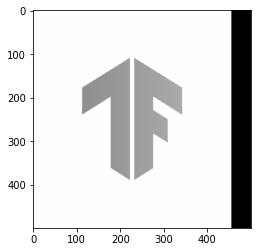

In [14]:
transform = tfa.image.transform(bw_img_rgb, [1.1, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0])
plt.imshow(transform[0])

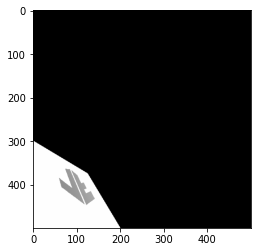

In [15]:
factor = -3e-3
flipped_bw = tf.image.random_flip_left_right(bw_img_rgb)
flipped_bw = tf.image.random_flip_up_down(flipped_bw)
transform = tfa.image.transform(flipped_bw, [1.0, 0.0, 0.0, 0.0, 1.0, 0.0, factor * 1.0, factor * 1.0])
transform = tf.image.random_flip_left_right(transform)
transform = tf.image.random_flip_up_down(transform)
_ = plt.imshow(transform[0])



tf.Tensor([[  1.   0.   1.   0.   1. 100.   0.   0.]], shape=(1, 8), dtype=float32)


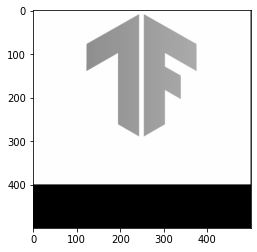

In [16]:
t = tfa.image.translations_to_projective_transforms([-1, -100])
print(t)
transform = tfa.image.transform(bw_img_rgb, t)
_ = plt.imshow(transform[0])

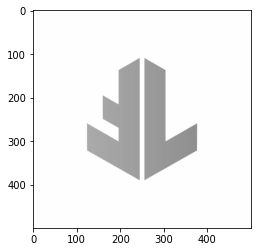

In [17]:
transform = tfa.image.rotate(bw_img_rgb, [3.14])
_ = plt.imshow(transform[0])

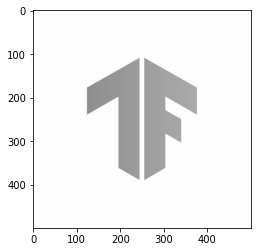

In [18]:
transform = tfa.image.sharpness(bw_img_rgb, 1)
_ = plt.imshow(transform[0])

(1, 500, 500, 3)


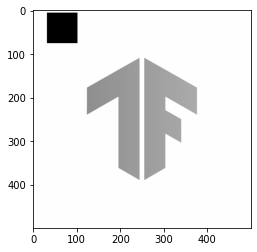

In [19]:
print(bw_img_rgb.shape)
transform = tfa.image.random_cutout(bw_img_rgb, (70,70), constant_values = 0)
_ = plt.imshow(transform[0])

In [20]:
bw_img.shape

TensorShape([500, 500, 1])

In [21]:
type(bw_img)
tf.is_tensor(bw_img)

True

In [26]:
ic(img.shape)
ic(bw_img.shape)
ic(bw_img_rgb.shape)
ic(bw_img_nhwc.shape)

out, l = apply_skew(bw_img_rgb, bw_img_rgb, [0.1, -0.3])
ic(out.shape)

ic| img.shape: TensorShape([500, 500, 3])
ic| bw_img.shape: TensorShape([500, 500, 1])
ic| bw_img_rgb.shape: TensorShape([1, 500, 500, 3])
ic| bw_img_nhwc.shape: (1, 500, 500, 1)
ic| out.shape: TensorShape([1, 500, 500, 3])


TensorShape([1, 500, 500, 3])

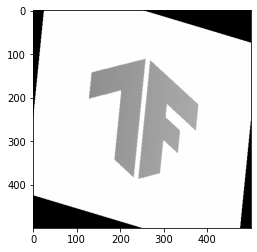

In [27]:
_ = plt.imshow(out[0])

ic| out.shape: TensorShape([500, 500, 1])


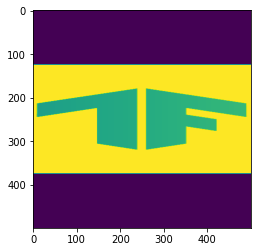

In [33]:
out, l = apply_zoom(bw_img, bw_img_rgb, [1.9, 0.5])
ic(out.shape)
_ = plt.imshow(out)

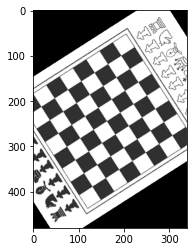

In [20]:
import os
os.chdir(os.path.join(os.getcwd(), "..", ".."))

img = cv.imread(os.path.join(os.getcwd(), "data", "test_data", "chess.jpg"), 0) 
nimg = img
img = img[np.newaxis, ...]
img = img[..., np.newaxis]


# nimg = bw_img
# nimg = nimg[:,:,0].numpy().astype('uint8')
# img = bw_img[np.newaxis, ...]

factor = -4e-4
transform = img
# transform = tfa.image.transform(img, [1.0, 0.0, 0.0, 0.0, 1.0, 0.0, factor * 1.0, factor * 1.0])
# transform = tfa.image.random_cutout(transform, (150,150), constant_values = 0)
transform = tfa.image.rotate(transform, [2.14])
transform = tf.image.grayscale_to_rgb(transform)
transform = tfa.image.mean_filter2d(transform, filter_shape=1)
transform = transform[:, :, :, 0]
transform = transform[..., np.newaxis]

_ = plt.imshow(transform[0], 'gray')
timg = transform.numpy()[0,:,:,0].astype('uint8')

In [21]:
ic(nimg.dtype)

ic(timg.shape)
ic(timg.dtype)

ic| nimg.dtype: dtype('uint8')
ic| timg.shape: (480, 339)
ic| timg.dtype: dtype('uint8')


dtype('uint8')

In [22]:
sift = cv.SIFT_create()

ic(nimg.shape, timg.shape)
kp1, des1 = sift.detectAndCompute(nimg,None)
kp2, des2 = sift.detectAndCompute(timg,None)

ic(len(kp1))
ic(len(kp2))

FLANN_INDEX_KDTREE = 0
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks = 50)

flann = cv.FlannBasedMatcher(index_params, search_params)

matches = flann.knnMatch(des1,des2,k=2)

good = []
for m,n in matches:
    # if m.distance < 0.7*n.distance:
    good.append(m)

ic(len(matches))
ic(len(good))

ic| nimg.shape: (480, 339), timg.shape: (480, 339)
ic| len(kp1): 935
ic| len(kp2): 857
ic| len(matches): 935
ic| len(good): 935


935

In [23]:
src_pts = np.float32([ kp1[m.queryIdx].pt for m in good ]).reshape(-1,1,2)
dst_pts = np.float32([ kp2[m.trainIdx].pt for m in good ]).reshape(-1,1,2)

M, mask = cv.findHomography(src_pts, dst_pts, cv.RANSAC,5.0)
print(M)
matchesMask = mask.ravel().tolist()

h,w = nimg.shape
pts = np.float32([ [0,0],[0,h-1],[w-1,h-1],[w-1,0] ]).reshape(-1,1,2)
dst = cv.perspectiveTransform(pts,M)

img2 = cv.polylines(timg,[np.int32(dst)],True,255,10, cv.LINE_AA)

[[-5.38581529e-01  8.41570346e-01  5.85173386e+01]
 [-8.40677831e-01 -5.39851315e-01  5.11489016e+02]
 [ 2.02317063e-06 -3.32540728e-06  1.00000000e+00]]


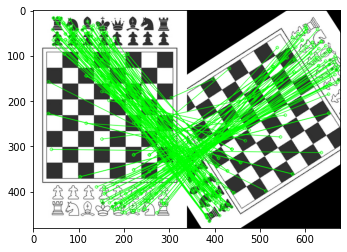

In [24]:
draw_params = dict(matchColor = (0,255,0), # draw matches in green color
                    singlePointColor = None,
                    matchesMask = matchesMask, # draw only inliers
                    flags = 2)

img3 = cv.drawMatches(nimg,kp1,timg,kp2,good,None,**draw_params)

plt.imshow(img3, 'gray')
plt.show()

In [25]:
import numpy as np
from image_similarity import register_img



In [26]:
transformed_img, ratio = register_img(nimg, timg)

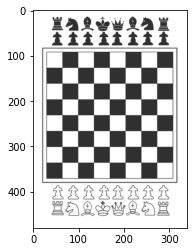

In [27]:
plt.imshow(nimg, 'gray')
plt.show()

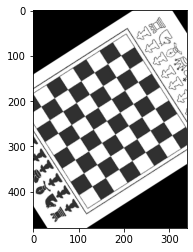

In [28]:
plt.imshow(timg, 'gray')
plt.show()

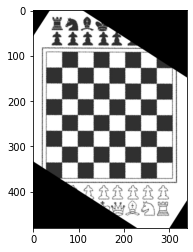

In [29]:
plt.imshow(transformed_img, 'gray')
plt.show()

In [30]:
y_true = np.ravel(nimg.astype("float16"))
y_pred = np.ravel(timg.astype("float16"))
y_pred2 = np.ravel(transformed_img.astype("float16"))

In [31]:
tf.keras.losses.MSE(y_true, y_true)

<tf.Tensor: shape=(), dtype=float16, numpy=0.0>

In [32]:
tf.keras.losses.MSE(y_true, y_pred)

<tf.Tensor: shape=(), dtype=float16, numpy=24830.0>

In [33]:
tf.keras.losses.MSE(y_true, y_pred2)

<tf.Tensor: shape=(), dtype=float16, numpy=12690.0>

In [27]:
from image_similarity import get_registation_error

img = cv.imread('../../data/test_data/chess.jpg', 0) 
nimg = img
img = img[np.newaxis, ...]
img = img[..., np.newaxis]
img = tf.convert_to_tensor(img)


#@tf.function(experimental_relax_shapes=True)
@tf.autograph.experimental.do_not_convert
def apply_transform(img, i):
    transform = tf.image.grayscale_to_rgb(img)
    transform = tfa.image.mean_filter2d(transform, filter_shape=i)
    transform = transform[:, :, :, 0]
    transform = transform[..., np.newaxis]
    return transform


factors = []
losses = []
ratioes = []
for i in range(1,30):
    factors.append(i)
    # transform = tfa.image.transform(img, [1.0, 0.0, 0.0, 0.0, 1.0, 0.0, factor * 1.0, factor * 1.0])
    transform = apply_transform(img, i)
    timg = transform.numpy()[0,:,:,0].astype('uint8')
    loss, ratio = get_registation_error(nimg, timg)
    losses.append(loss)
    ratioes.append(ratio)

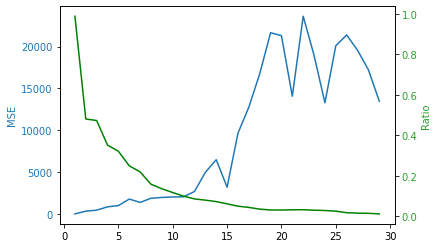

In [28]:
fig, ax1 = plt.subplots()
# ax1.set_xscale("log")
ax1.plot(factors, losses)
ax1.set_ylabel("MSE", color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')
ax2 = ax1.twinx()
ax2.plot(factors, ratioes, "g-")
ax2.set_ylabel("Ratio", color='tab:green')
ax2.tick_params(axis='y', labelcolor='tab:green')